In [15]:
%matplotlib widget

In [16]:
from csd.global_result_manager import GlobalResultManager

## Q1: Does our detector implementation yield better results than Homodyne?
#### Let's check it out for several modes

In [17]:
import numpy as np
alpha_init = 0.1
alpha_end = 1.4
number_points_to_plot = 16
alpha_step = (alpha_end - alpha_init) / number_points_to_plot
alphas = list(np.arange(alpha_init, alpha_end, alpha_step))

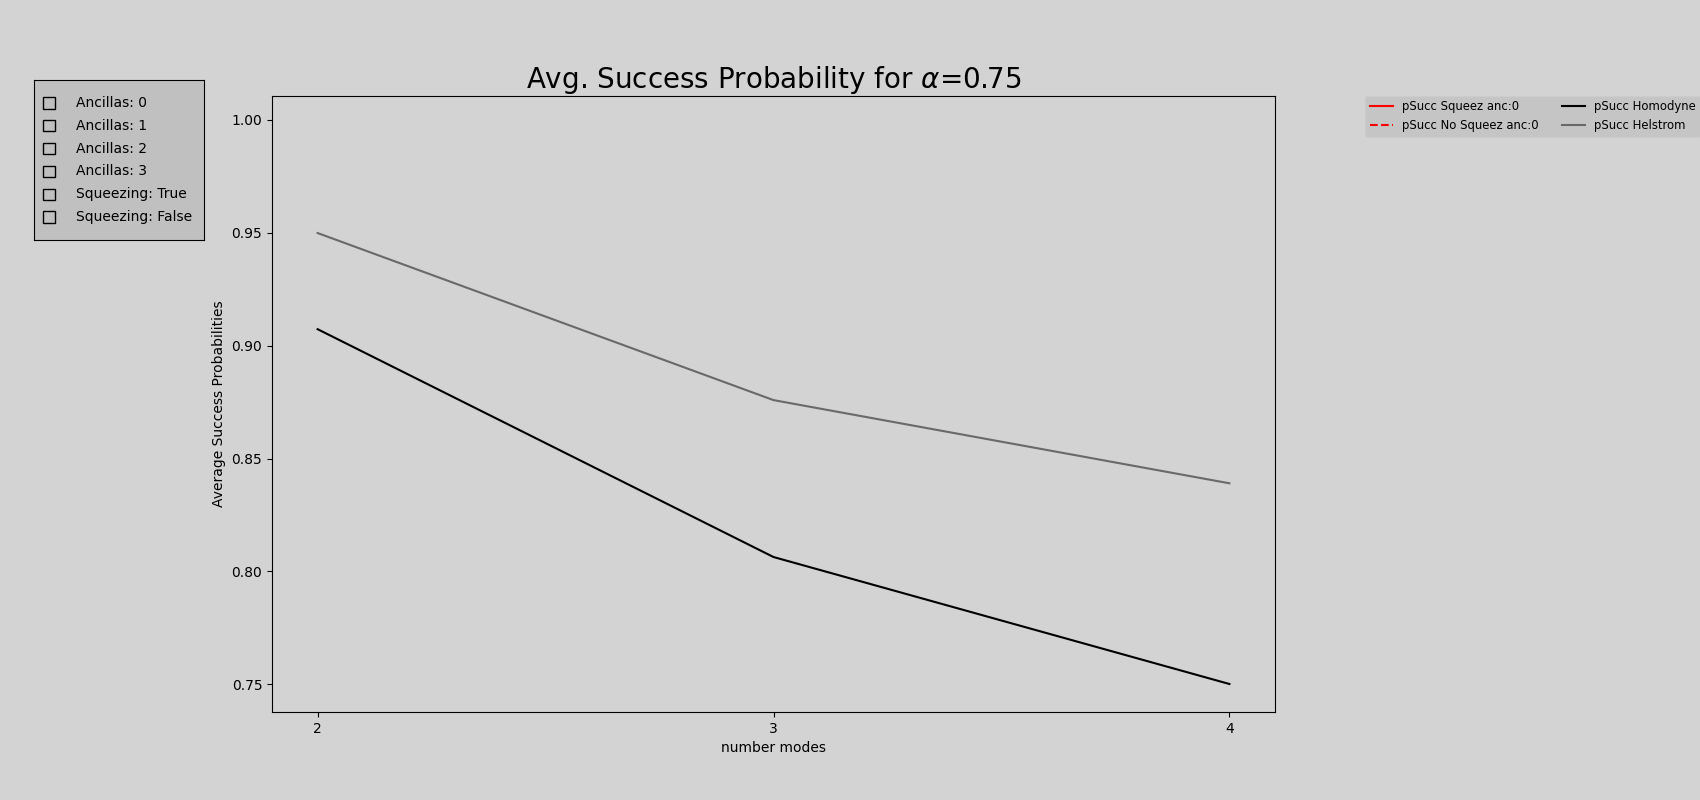

In [18]:
GlobalResultManager().plot_modes_probs(one_alpha=alphas[8], save_plot=False, interactive_plot=True)

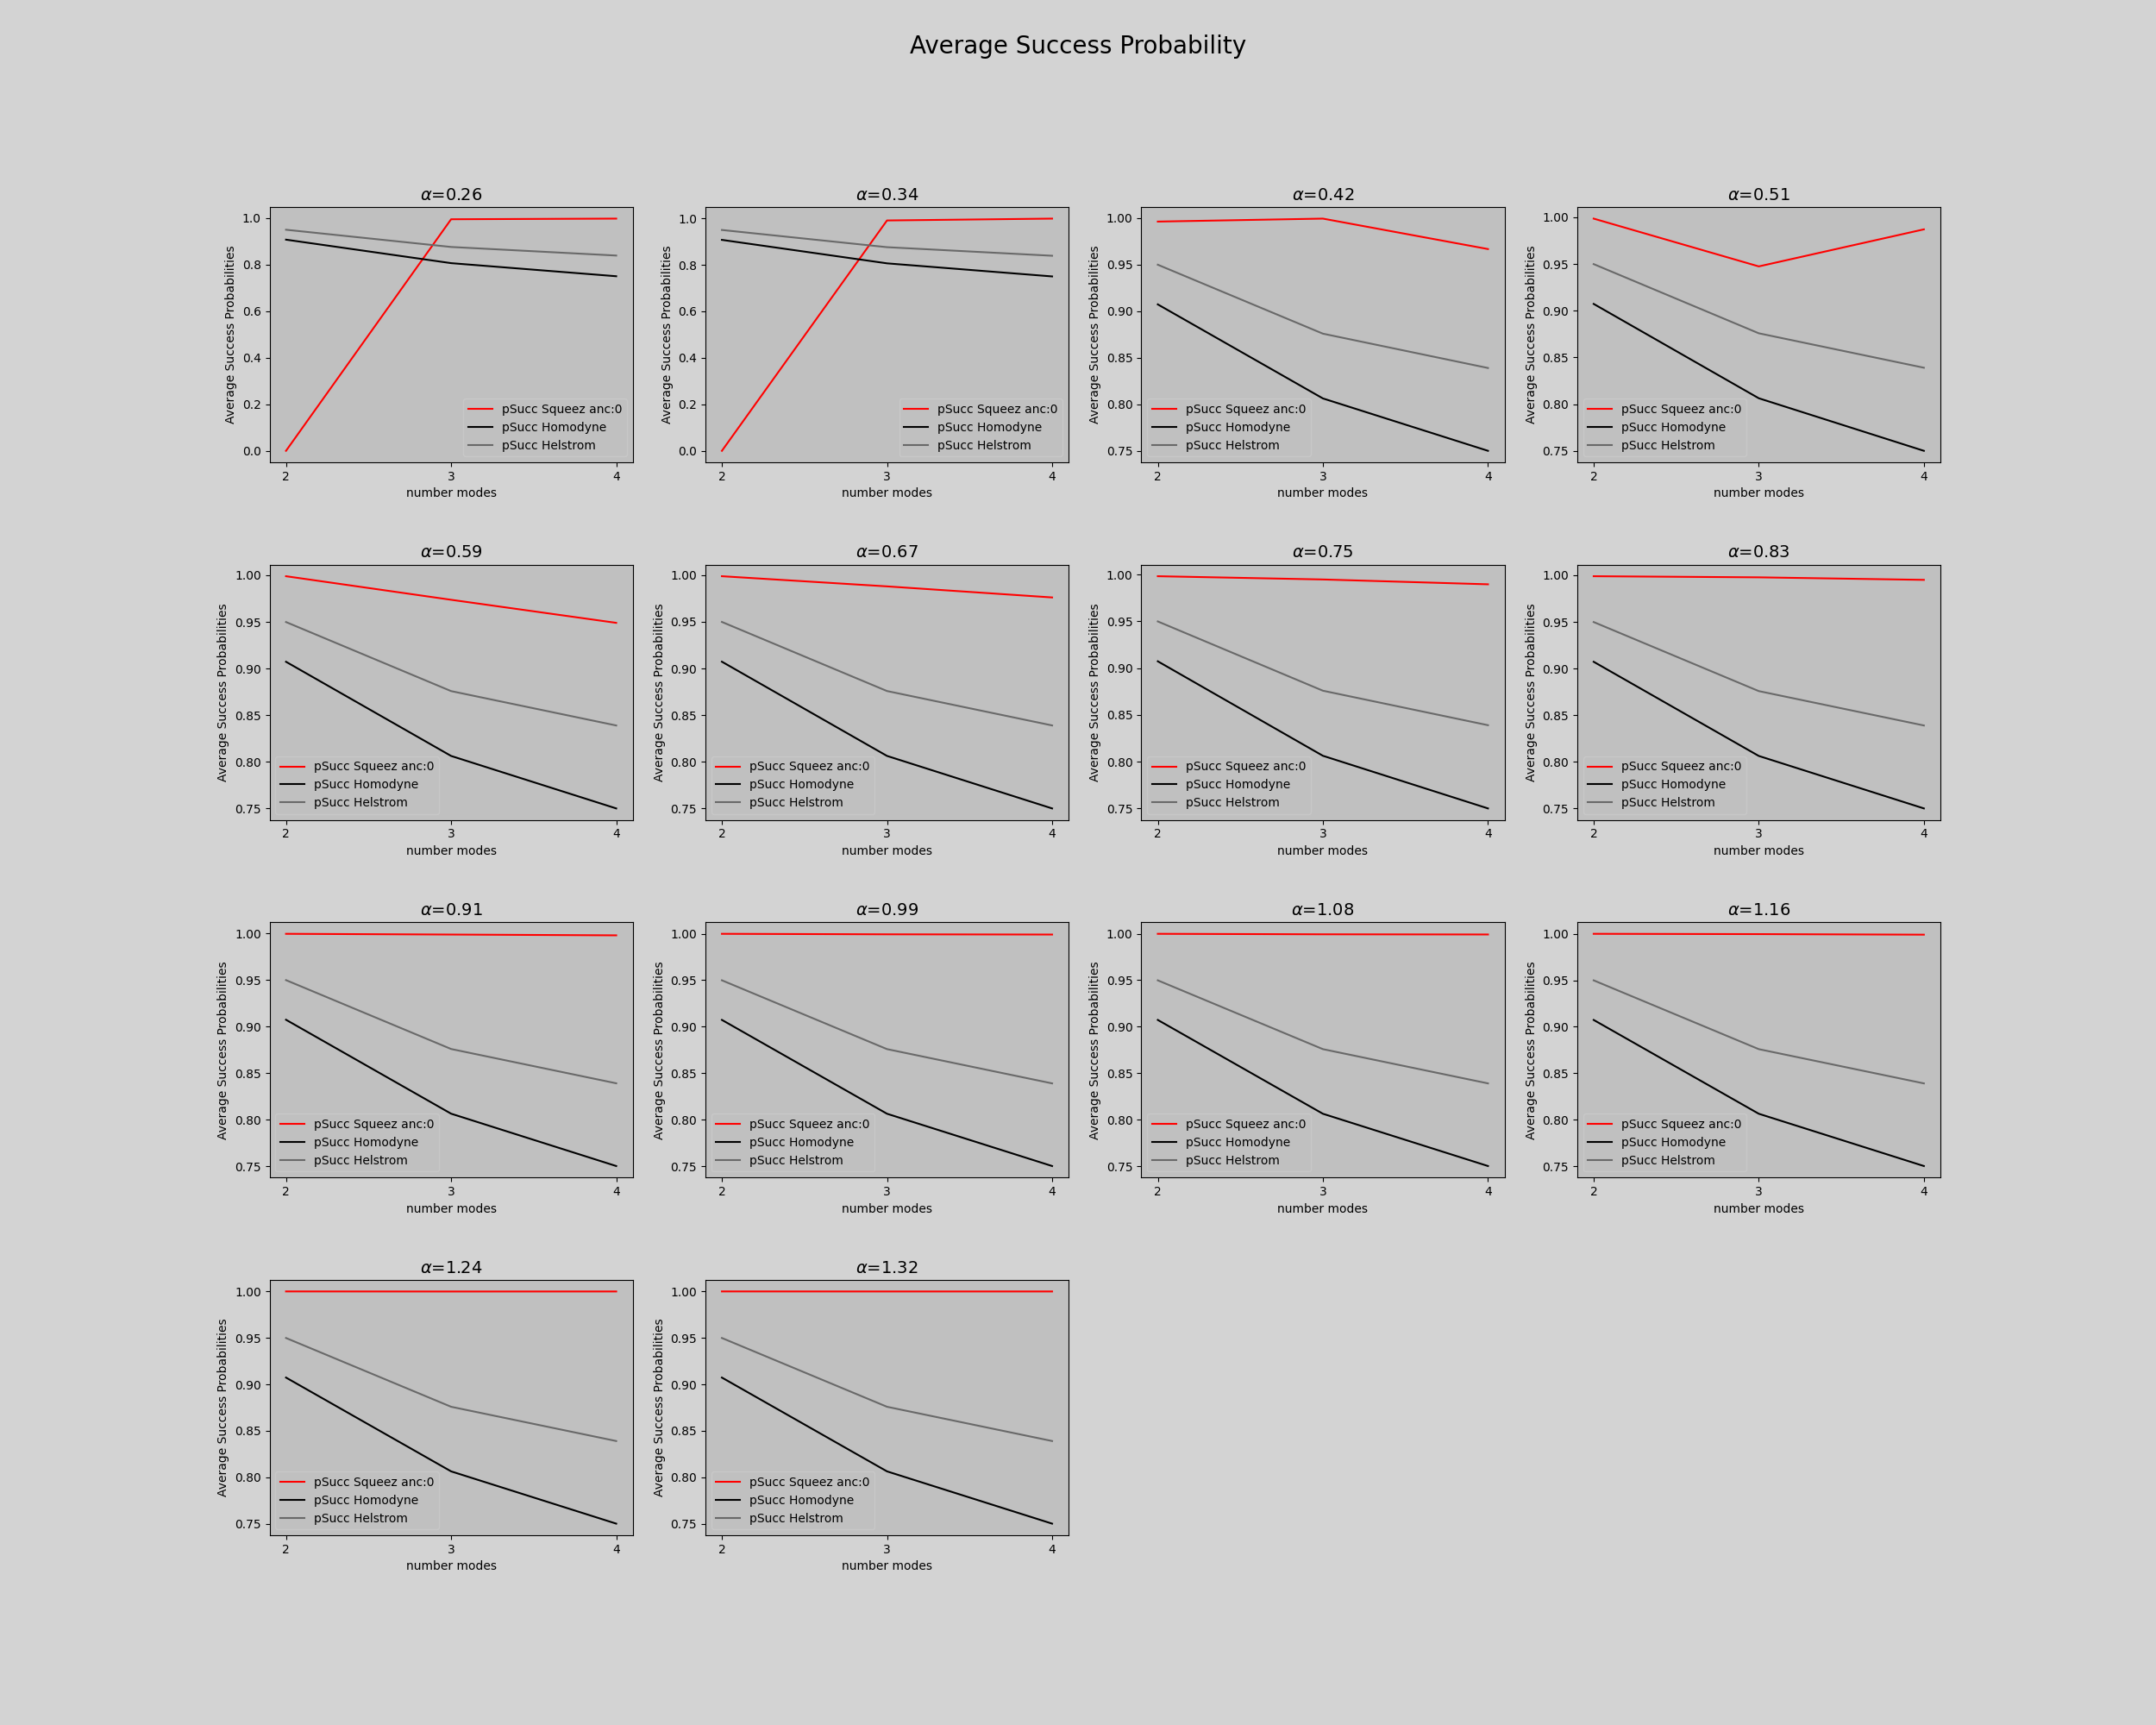

In [19]:
GlobalResultManager().plot_modes_probs(save_plot=False, squeezing=True)

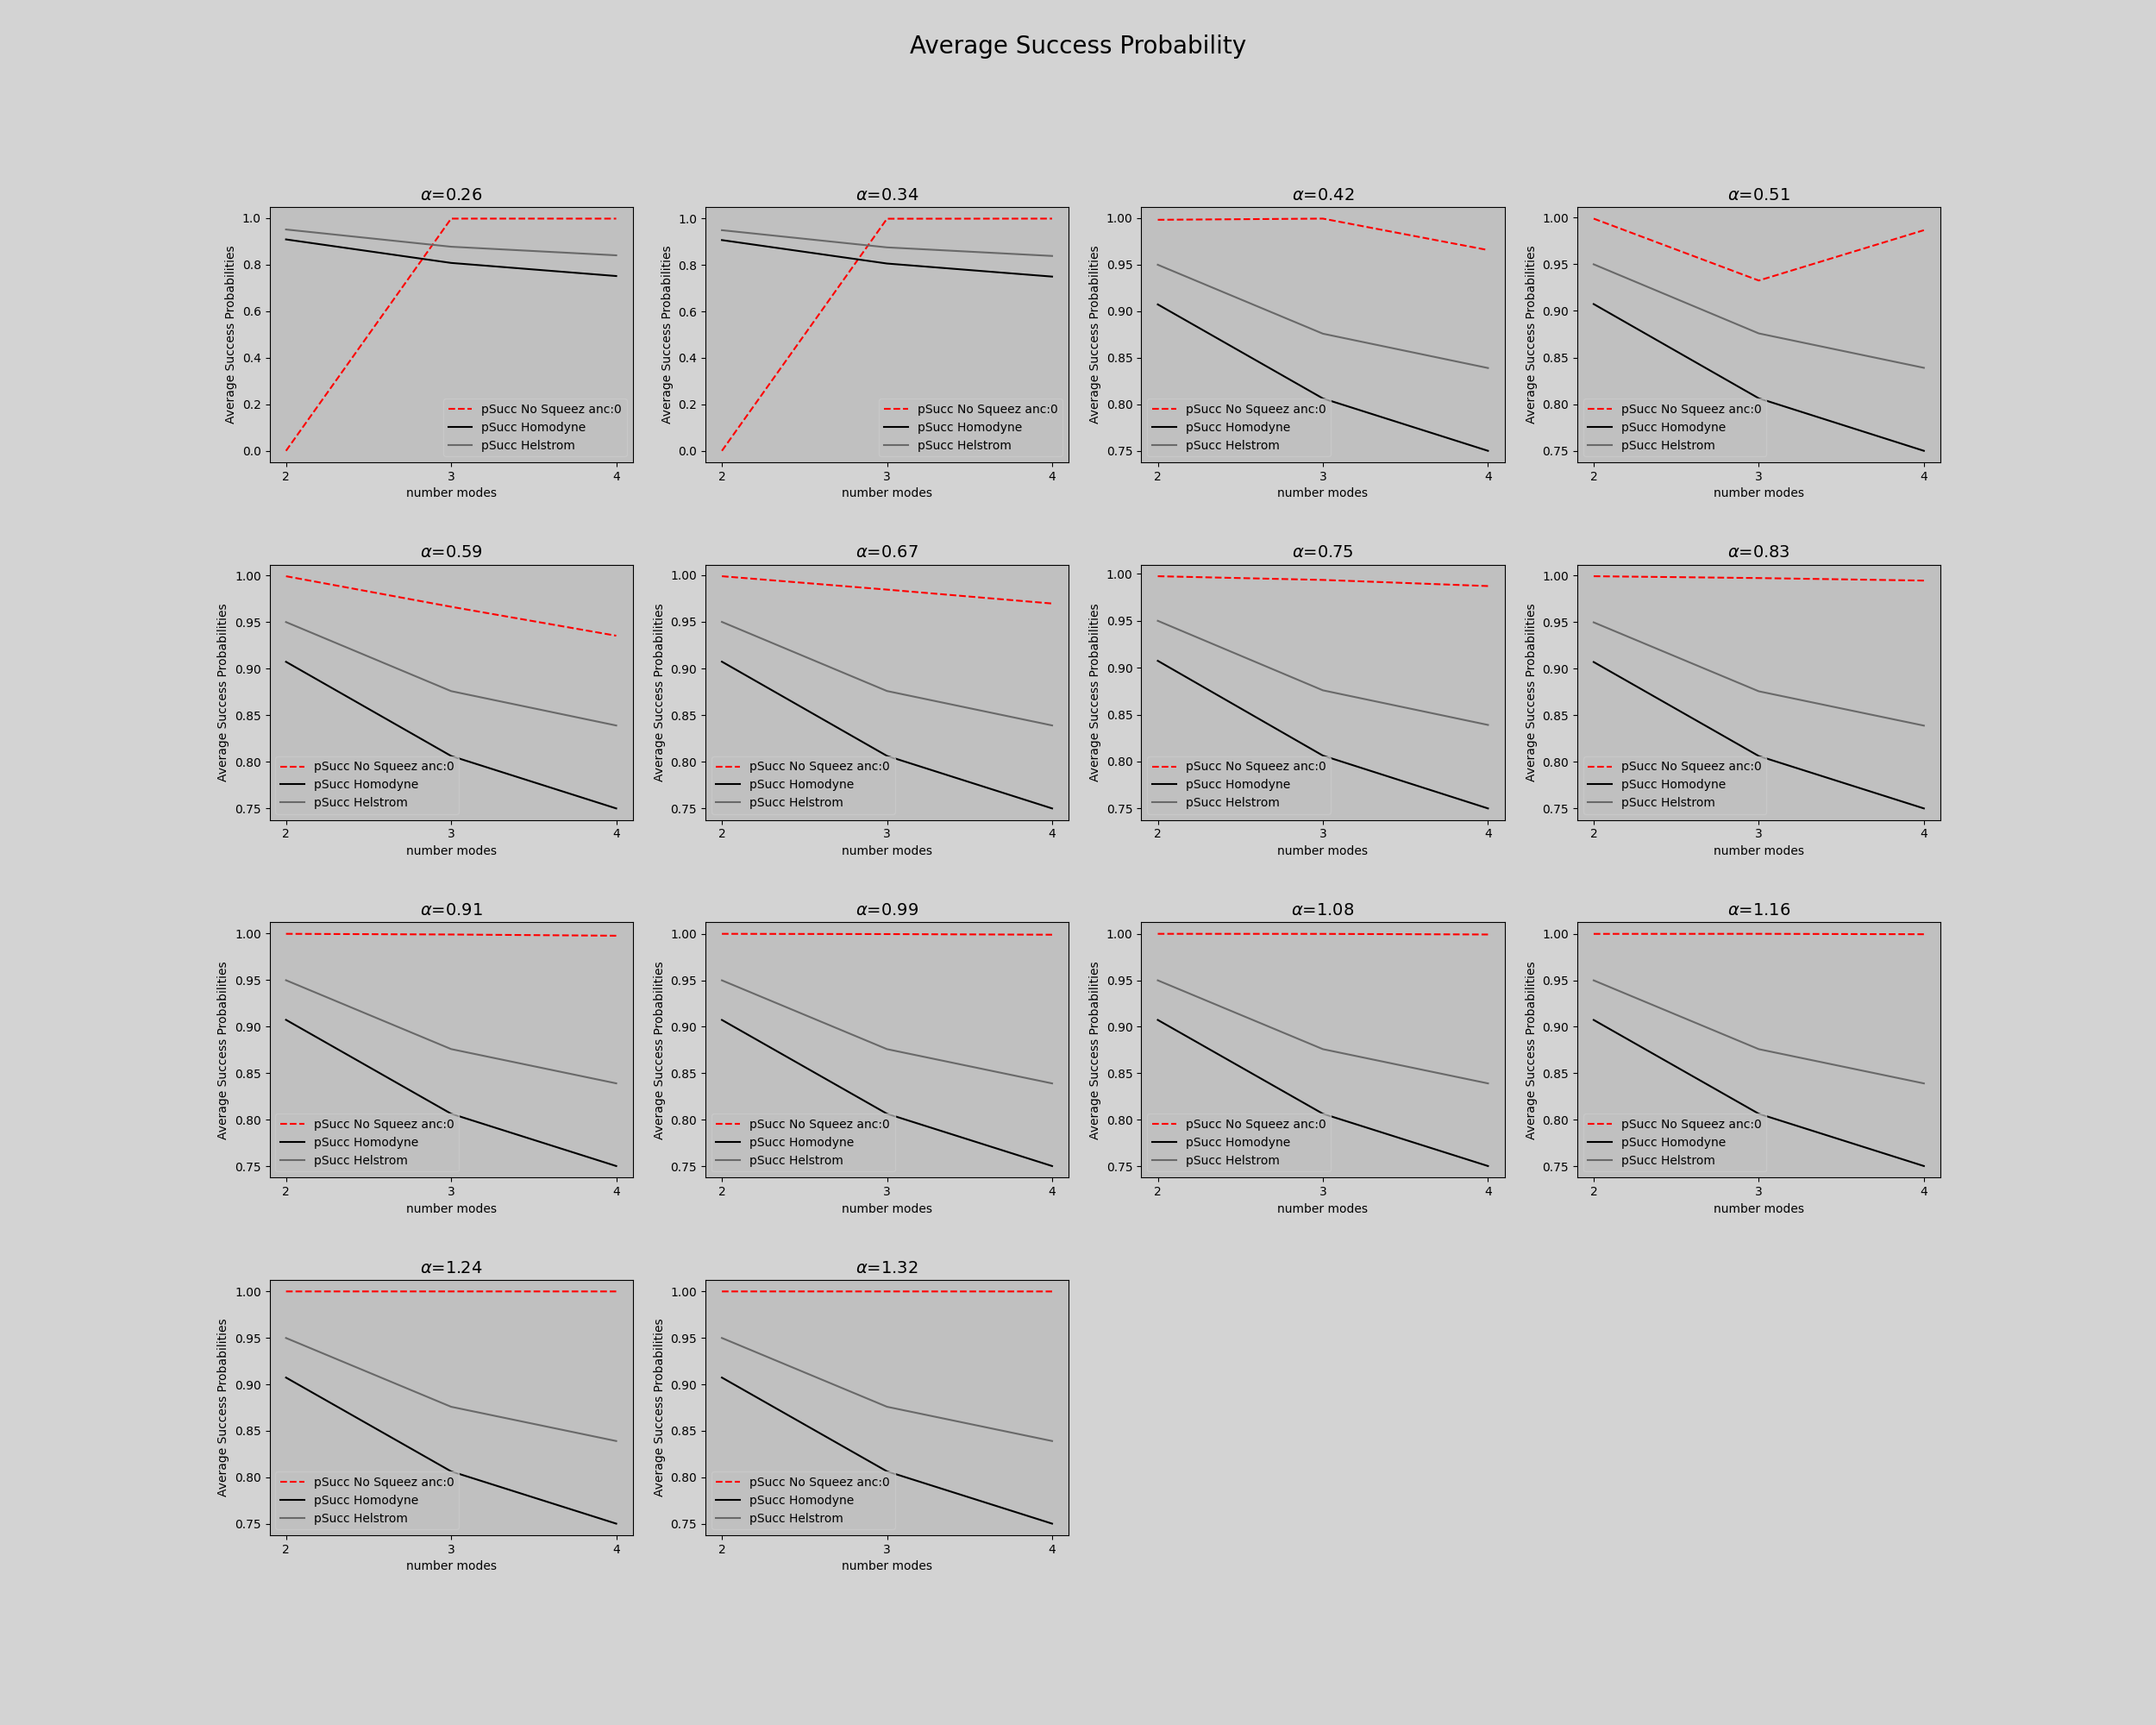

In [21]:
GlobalResultManager().plot_modes_probs(save_plot=False, squeezing=False, non_squeezing=True)

## Q2: How does it scale with the number of modes compared to the Homodyne?

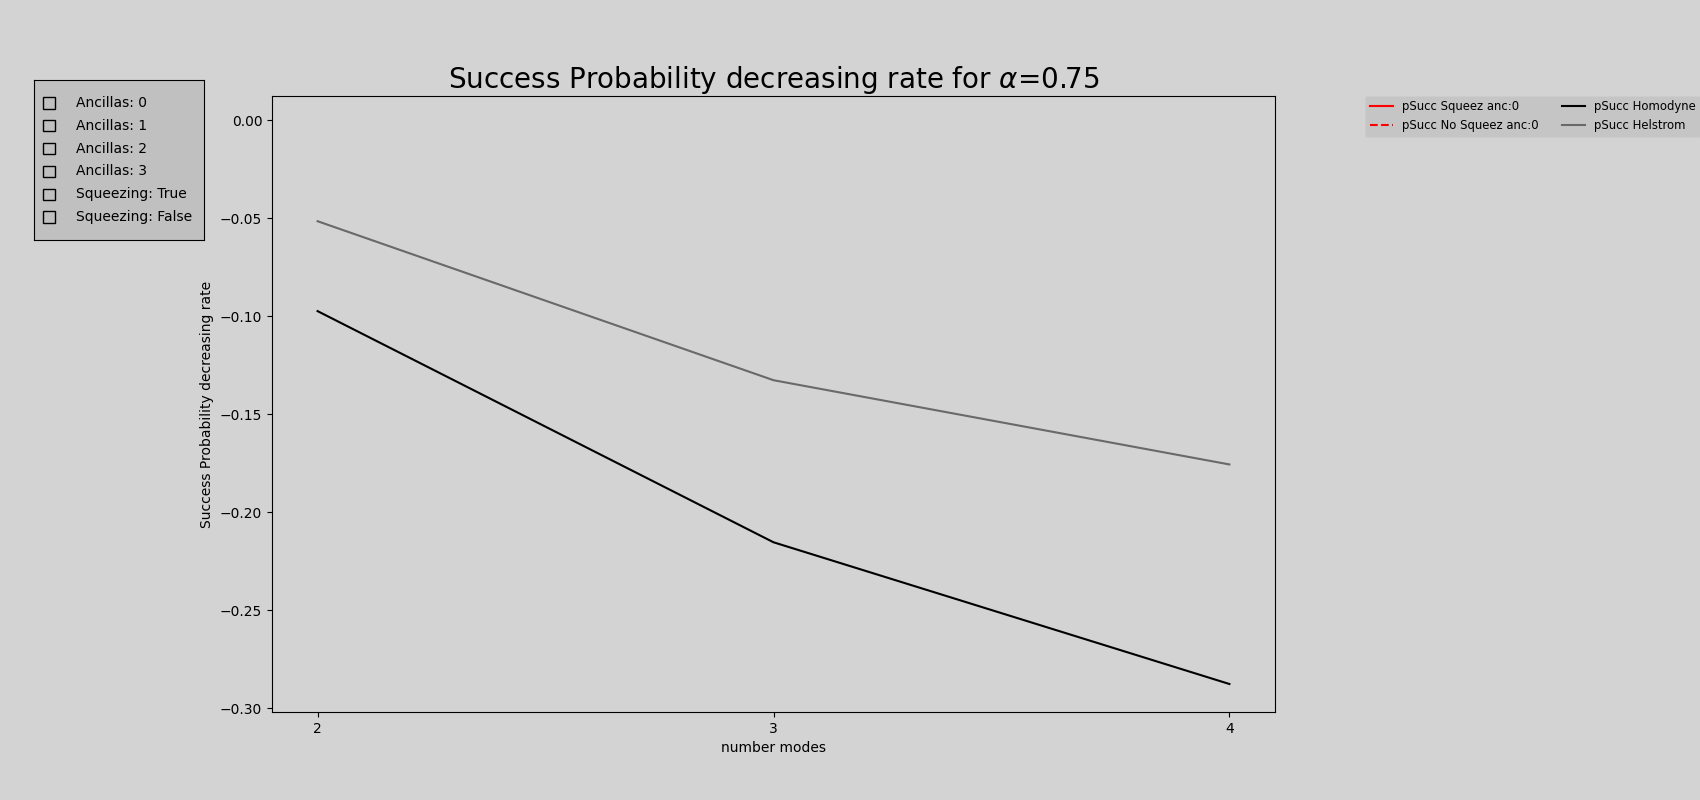

In [22]:
GlobalResultManager().plot_modes_probs(one_alpha=alphas[8], save_plot=False, apply_log=True, interactive_plot=True)

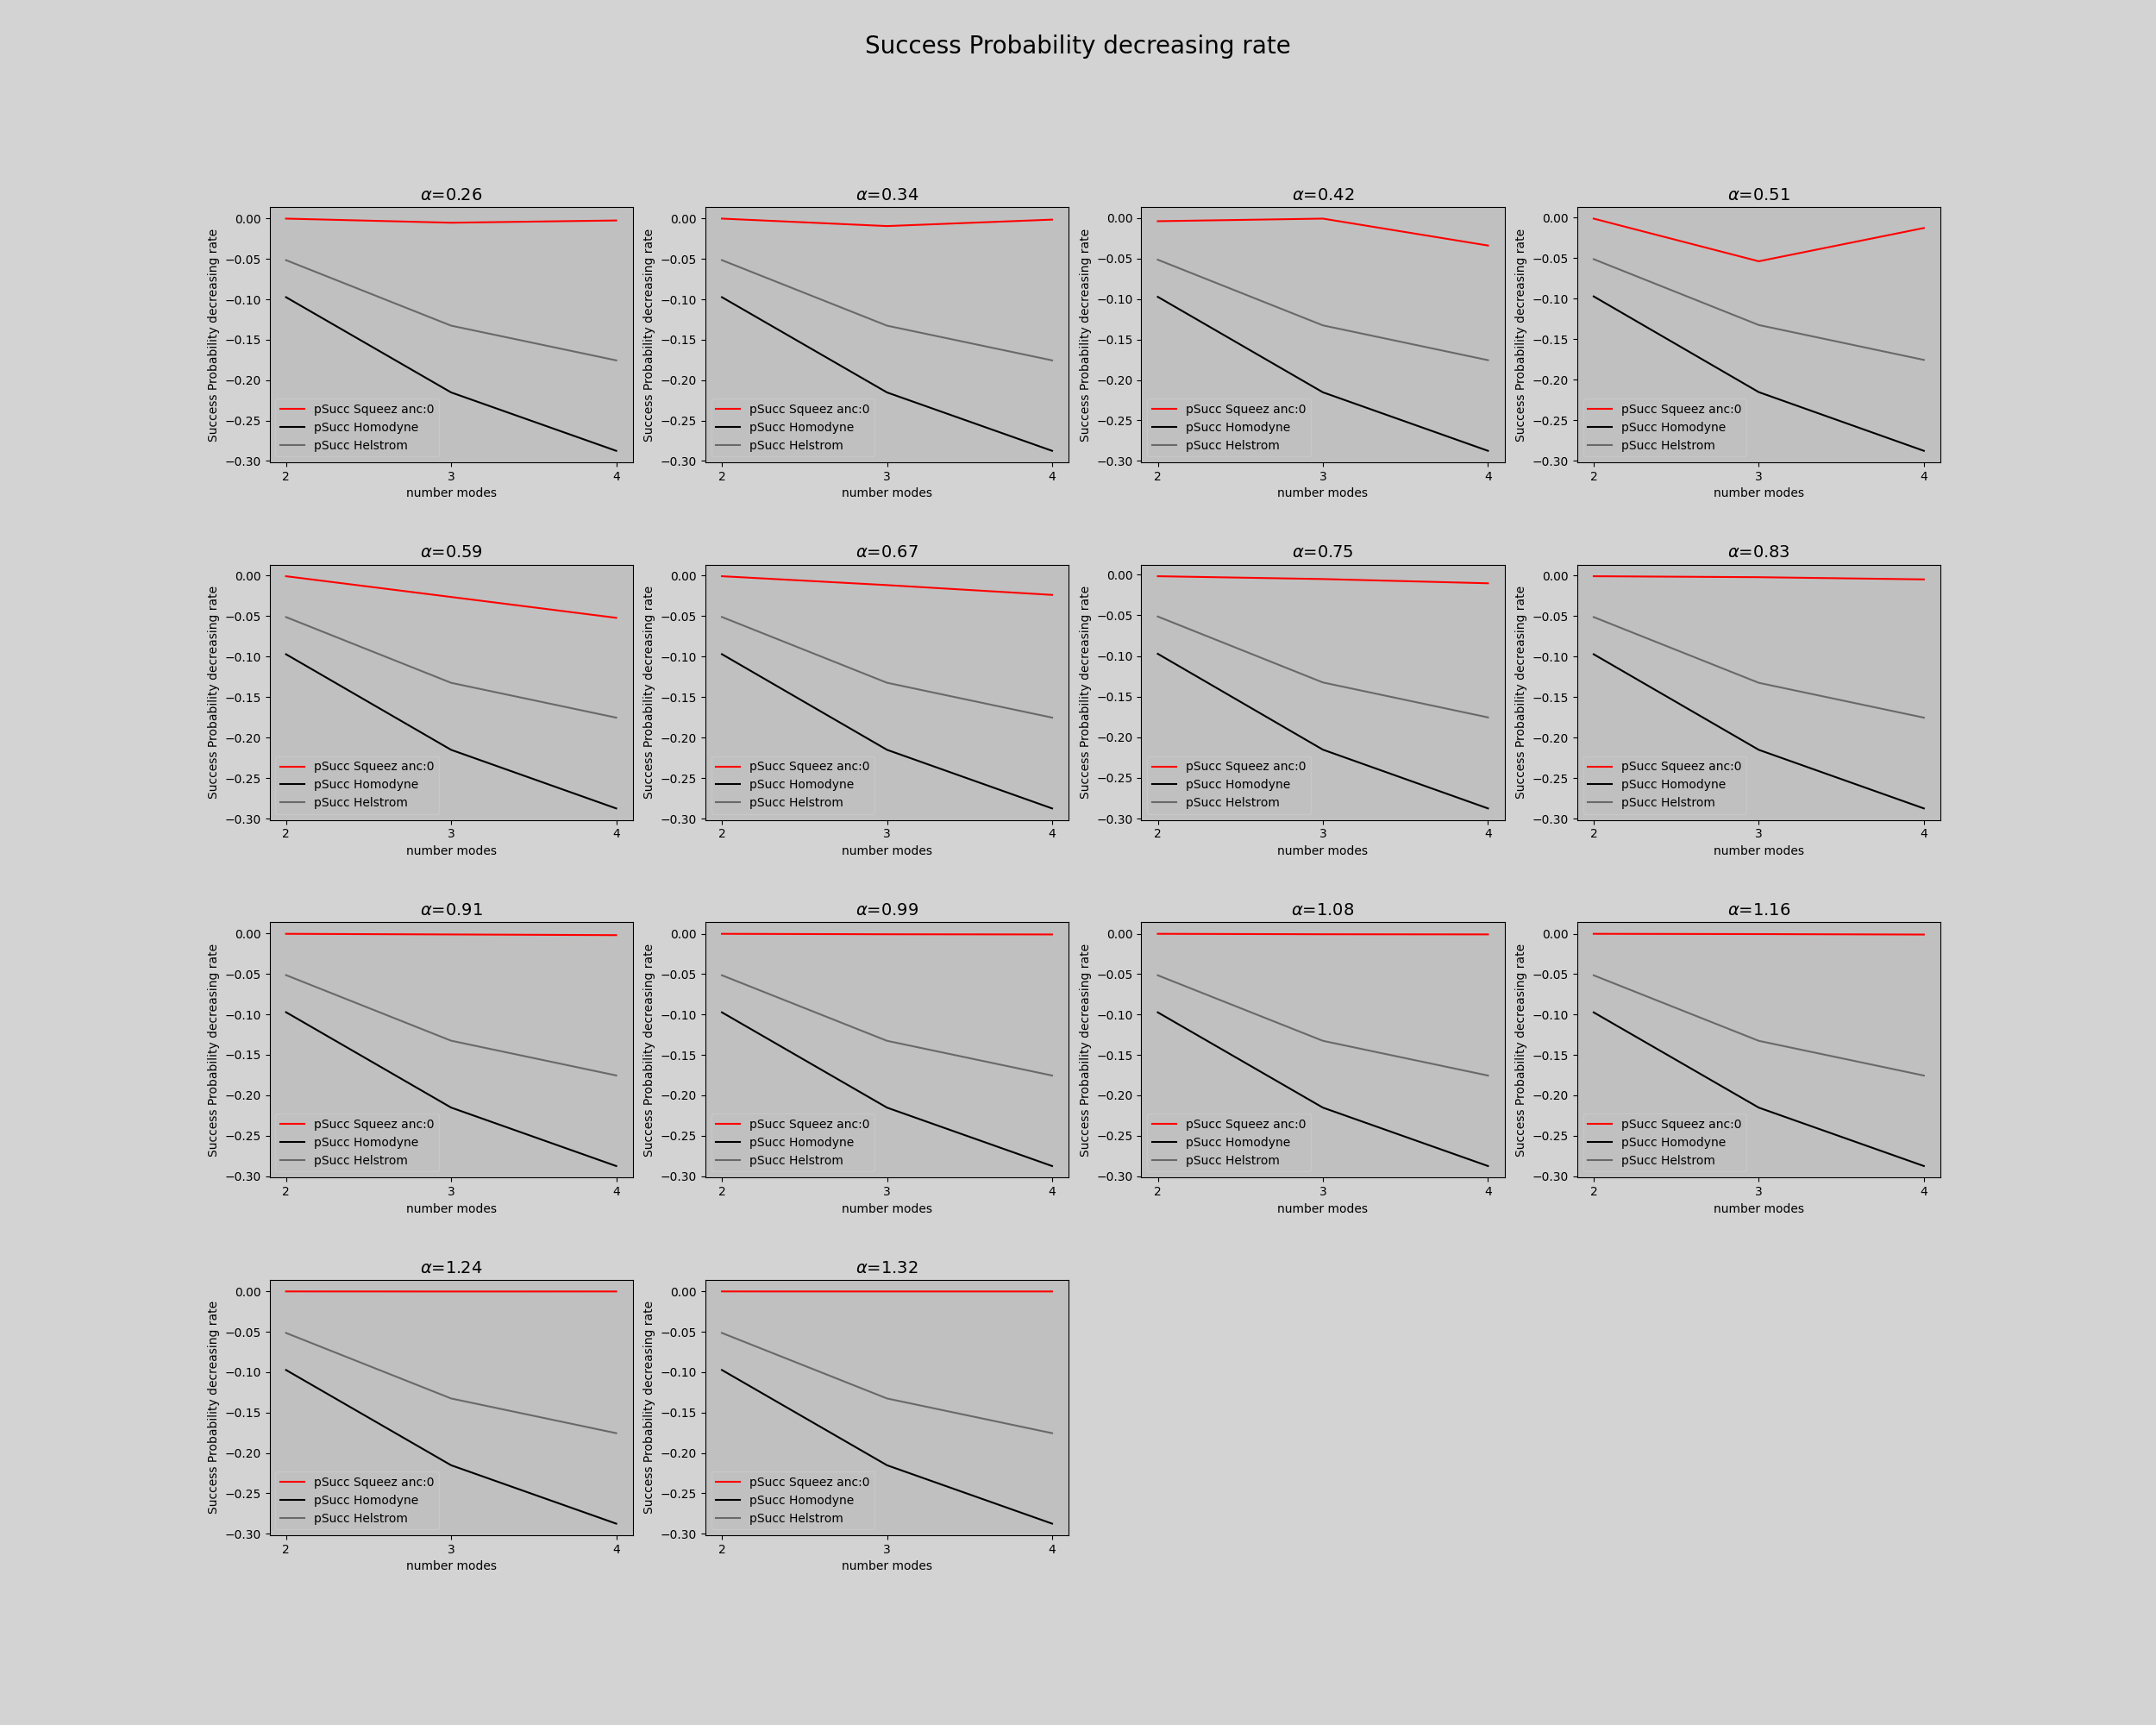

In [23]:
GlobalResultManager().plot_modes_probs(save_plot=False, apply_log=True)

## Q3: How does the results differ depending on the resources used?

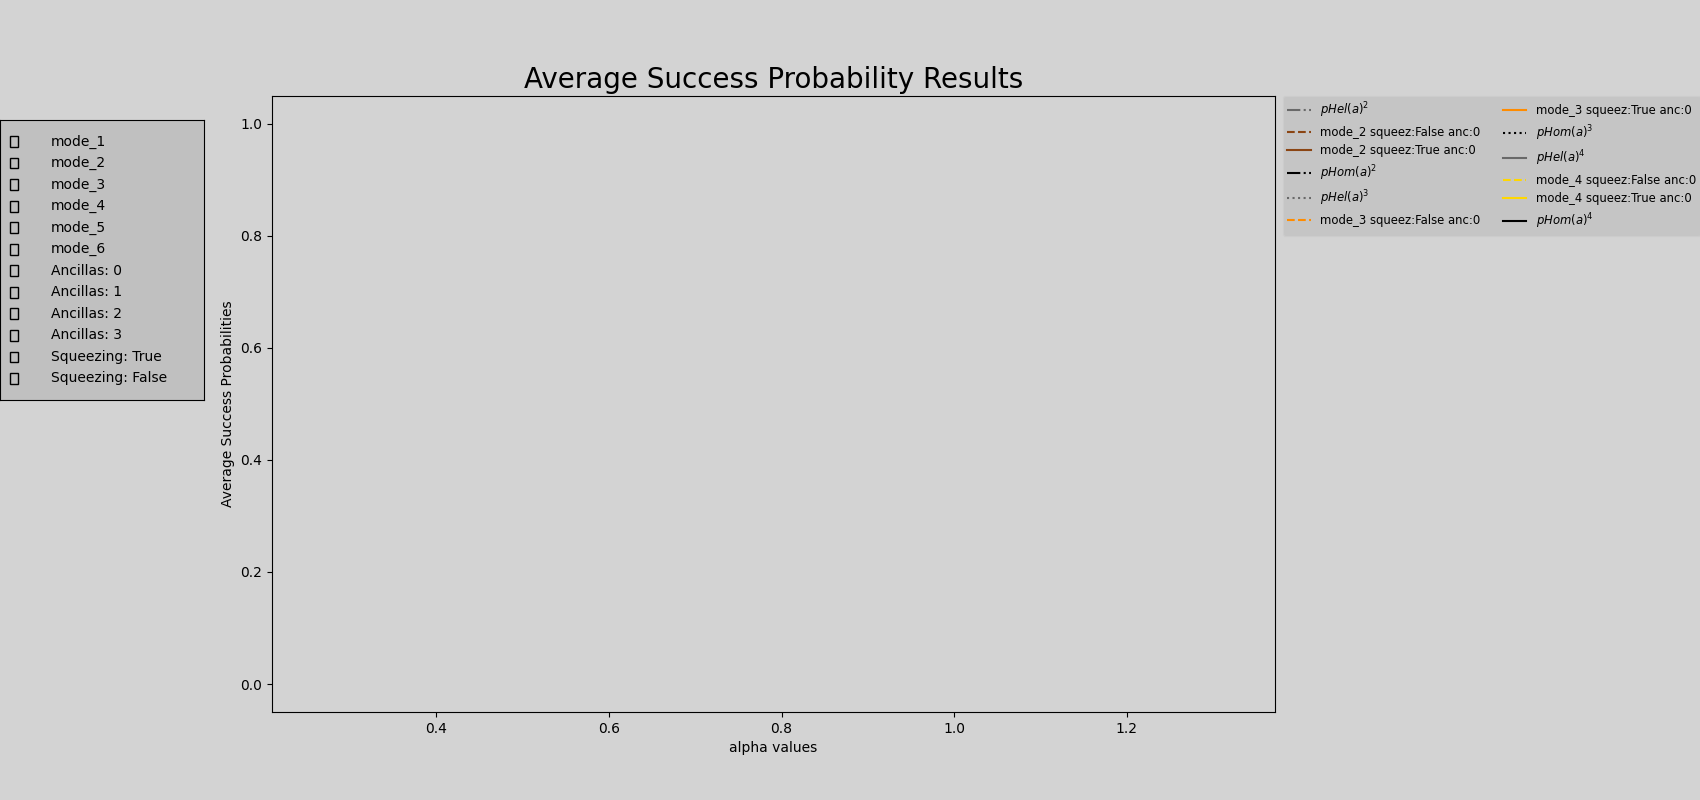

In [24]:
GlobalResultManager().plot_success_probabilities(interactive_plot=True)